In [1]:
%pylab inline
from parcels import FieldSet, Field, ParticleSet, JITParticle, AdvectionRK4, ErrorCode, Variable
import cartopy
from glob import glob
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import xarray as xr
from netCDF4 import Dataset
import math as math
sys.path.insert(1, '/Users/f103457/surfdrive/GalapagosAnalysis/functions')
from ParticlePlotFunctions import *
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#load MITgcm

Ufiles = '../input/modelfields/MITgcm4km/RGEMS_2008_Surf.nc'
Xfiles = '../input/modelfields/MITgcm4km/RGEMS3_Surf_grid.nc'
date = 257
dfile = Dataset(Ufiles)
Uvel_MIT = dfile.variables['UVEL'][date,:,:]
Vvel_MIT = dfile.variables['VVEL'][date,:,:]
dfile = Dataset(Xfiles)
lon_MIT = dfile.variables['XC'][:]
lat_MIT = dfile.variables['YC'][:]

#load LLC4320

Ufiles = '../input/modelfields/LLC4320/LLC4320_Galapagos_20110913.nc'
Xfiles = '../input/modelfields/LLC4320/LLC4320_galapagosgrid.nc'
dfile = Dataset(Ufiles)
Uvel_LLC = dfile.variables['UVEL'][12,:,:]
Vvel_LLC = dfile.variables['VVEL'][12,:,:]
dfile = Dataset(Xfiles)
lon_LLC = dfile.variables['lonC'][:]
lat_LLC = dfile.variables['latC'][:]

#load CMEMS

Ufiles = '../input/modelfields/CMEMS/cmems2016-09-13uo.nc'
dfile = Dataset(Ufiles)
Uvel_CMEMS = dfile.variables['uo'][0,0,:,:]
lon_CMEMS = dfile.variables['longitude'][:]
lat_CMEMS = dfile.variables['latitude'][:]
Vfiles = '../input/modelfields/CMEMS/cmems2016-09-13vo.nc'
dfile = Dataset(Vfiles)
Vvel_CMEMS = dfile.variables['vo'][0,0,:,:]


/opt/anaconda3/envs/py3_parcels/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt


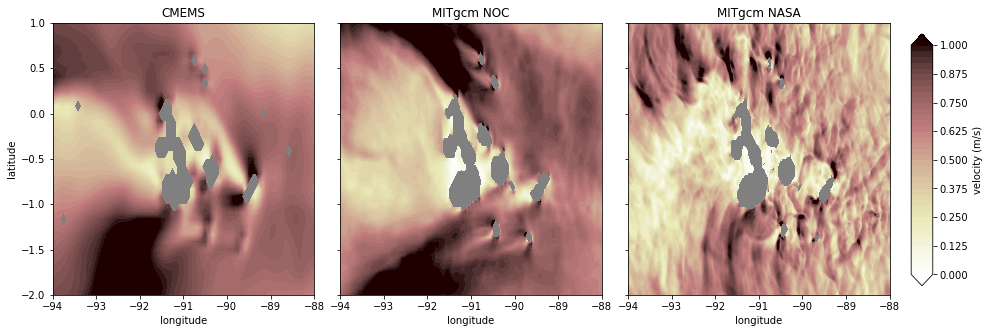

In [14]:
figsize = (15,5)
levels = np.linspace(0, 1, 41)
map_extent = [-94,-88,-2,1]
fig, axs = plt.subplots(1, 3, figsize=figsize, 
                                  sharex = True, 
                                  sharey = True)
fig.subplots_adjust(hspace=.1, wspace=.1)
axs = axs.ravel()

Uvel_LLC[Uvel_LLC==0]=nan
Vvel_LLC[Vvel_LLC==0]=nan
speed = sqrt(Uvel_LLC**2 + Vvel_LLC**2)
axs[2].contourf(lon_LLC,lat_LLC,speed,       
                levels = levels,    
                cmap='pink_r',       
                extend='both',      
                origin='lower')     
axs[2].set_title('MITgcm NASA')      
axs[2].set_xlim(map_extent[0:2])
axs[2].set_ylim(map_extent[2:4])
axs[2].set_facecolor('gray')
axs[2].set_xlabel('longitude')                 

Uvel_MIT[Uvel_MIT==0]=nan
Vvel_MIT[Vvel_MIT==0]=nan
speed = sqrt(Uvel_MIT**2 + Vvel_MIT**2)
axs[1].contourf(lon_MIT,lat_MIT,speed,       
                levels = levels,    
                cmap='pink_r',       
                extend='both',      
                origin='lower')     
axs[1].set_title('MITgcm NOC')      
axs[1].set_xlim(map_extent[0:2])
axs[1].set_ylim(map_extent[2:4])
axs[1].set_facecolor('gray')
axs[1].set_xlabel('longitude')

Uvel_CMEMS[Uvel_CMEMS==0]=nan
Vvel_CMEMS[Vvel_CMEMS==0]=nan
speed = sqrt(Uvel_CMEMS**2 + Vvel_CMEMS**2)
im=axs[0].contourf(lon_CMEMS,lat_CMEMS,speed,       
                levels = levels,    
                cmap='pink_r',       
                extend='both',      
                origin='lower')     
axs[0].set_title('CMEMS')      
axs[0].set_xlim(map_extent[0:2])
axs[0].set_ylim(map_extent[2:4])
axs[0].set_facecolor('gray')
axs[0].set_xlabel('longitude')               
axs[0].set_ylabel('latitude') 

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, extend='max')
cbar.ax.set_ylabel('velocity (m/s)')

plt.savefig('modelcomparison.pdf')        